**Importation des données**

Le dataset CIFRA-10 est constitué de 60 000 images colorées en format 32x32 distrubées en 10 classes : 
 50 000 images serviront d'entrainement du ou des modèles et 10 000 au test.

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [2]:
train_Y.view()

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

**Visualisation des images**

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


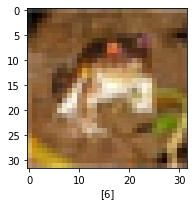

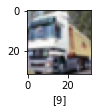

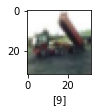

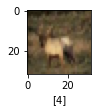

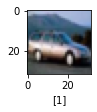

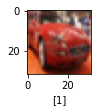

In [3]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.xlabel(train_Y[i])
  plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

**Conversion des pixels en float et normalisation des données**

In [5]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

**One-hot encoding**

In [6]:
train_Y=np_utils.to_categorical(train_Y) # On transforme un vecteur(array) en matrice binaire (Ex : si chien alors =1 , =0 si non )
test_Y=np_utils.to_categorical(test_Y)
# voila à quoi ressemble un one-hot encoding
#   chien   1 0 0
#   chat    0 1 0
#   camion  0 0 1
num_classes=test_Y.shape[1]

In [7]:
train_Y
# A comparer avec la valeur de train_Y au départ pour voir ce que fait un one-hot encoding

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Création du modèle**

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Configuration de l'optimizer et compilation de notre modèle**

In [10]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

**Entrainement de notre modèle**

In [12]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 252s 161ms/step - loss: 1.7274 - accuracy: 0.3758 - val_loss: 1.4200 - val_accuracy: 0.4941
Epoch 2/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.3564 - accuracy: 0.5110 - val_loss: 1.2137 - val_accuracy: 0.5678
Epoch 3/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.1879 - accuracy: 0.5771 - val_loss: 1.1248 - val_accuracy: 0.5998
Epoch 4/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.0699 - accuracy: 0.6176 - val_loss: 1.0572 - val_accuracy: 0.6247
Epoch 5/10
1563/1563 [==============================] - 266s 170ms/step - loss: 0.9788 - accuracy: 0.6513 - val_loss: 1.0010 - val_accuracy: 0.6459
Epoch 6/10
1563/1563 [==============================] - 262s 168ms/step - loss: 0.8917 - accuracy: 0.6868 - val_loss: 0.9465 - val_accuracy: 0.6605
Epoch 7/10
1563/1563 [==============================] - 262s 167ms/step - loss: 0.8216 - accuracy: 0.7102 - val_

**Accuracy du modèle**

In [13]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 10s 33ms/step - loss: 0.8982 - accuracy: 0.6906
69.05999779701233


**Sauvegarde du modèle**

In [14]:
model.save("model1_cifar_10epoch.h5")

**Changement des numéros en leur valeur**

In [15]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

**Test du modèle avec n'importe quelle image**

In [26]:
from PIL import Image
import numpy as np

# j'ai upload dans mon drive une photo d'un camion, photo nommée "camion.jpg"
file_path = "camion.jpg"
im=Image.open(file_path)

# l'image doit etre au format 32x32
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred = np.argmax(model.predict([im])[0], axis=-1)
print(pred,results[pred])

9 truck
